In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.model_selection import learning_curve

# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("hyperthyroidism3_FinalDataSet_April.csv", encoding='latin-1')
df.dropna(inplace=True)

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values  


In [3]:
df.head()

,aphp,nhph,tertiary_hp,secondary_hp,age,gender,height,weight,bmi,marital_status,...,nephrolithiasis,bone_specific_alp,corrected_calcium_by_albumin,serum_calcium_phosphorus_ratio,pf_index,alp_combined_with_cl_po4,third_surgery_pathology_report,fourth_surgery_pathology_report,triglycerides,hdl_cholesterol
0,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,0,0,0,0,60,1,0,0,0.0,1,...,0,0.0,11.2,2.8,147.0,0.0,0,0,0,0
2,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,1,0,0,0,55,1,170,73,0.0,1,...,0,0.0,12.1,4.4,413.0,0.0,0,0,0,0


In [4]:


import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_classifier = DecisionTreeClassifier()
start_time = time.time()
dt_classifier.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")


Training time: 0.0 seconds


## Splitting & Using DT


## Using Evaluation Metrics

Accuracy =  88.0 %
Precision =  0.8770799785292538
Recall =  0.881447963800905
F1-score =  0.8786189534256428


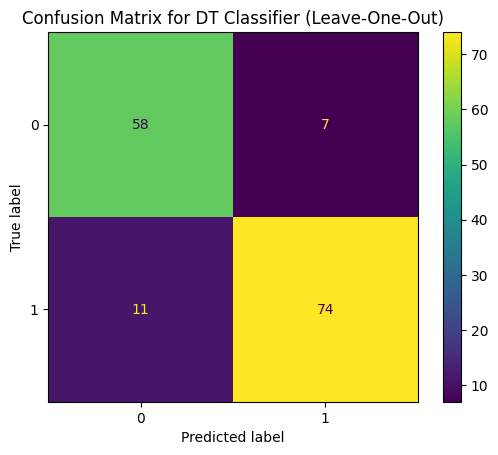

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        65
           1       0.91      0.87      0.89        85

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150



In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='macro'))
print("Recall = ", recall_score(y_test, y_pred,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred,average='macro'))
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for DT Classifier (Leave-One-Out)')
plt.show()
# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



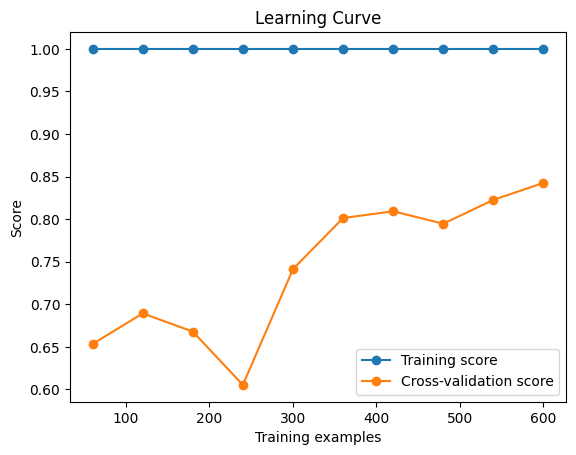

In [6]:
train_sizes, train_scores, test_scores = learning_curve(decision_tree, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()